In [207]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

In [264]:
# import data

floor1_2018 = pd.read_csv('C:/Ironhack/Week5-Project/archive/2018Floor1.csv')
floor2_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor2.csv")
floor3_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor3.csv")
floor4_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor4.csv")
floor5_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor5.csv")
floor6_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor6.csv")
floor7_2018 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2018Floor7.csv")

floor1_2019 = pd.read_csv('C:/Ironhack/Week5-Project/archive/2019Floor1.csv')
floor2_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor2.csv")
floor3_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor3.csv")
floor4_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor4.csv")
floor5_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor5.csv")
floor6_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor6.csv")
floor7_2019 = pd.read_csv("C:/Ironhack/Week5-Project/archive/2019Floor7.csv")

meteo = pd.read_csv('C:/Ironhack/Week5-Project/meteorological_data_bangkok_2018_2019.csv')

In [209]:
# building= pd.concat([floor1_2018,floor2_2018,floor3_2018,floor4_2018,floor5_2018,floor6_2018,floor7_2018,floor1_2019,floor2_2019,floor3_2019,floor4_2019,floor5_2019,floor6_2019,floor7_2019], axis=0)

In [210]:
floor1= pd.concat([floor1_2018,floor1_2019], axis=0)
floor2= pd.concat([floor2_2018,floor2_2019], axis=0)
floor3= pd.concat([floor3_2018,floor3_2019], axis=0)
floor4= pd.concat([floor4_2018,floor4_2019], axis=0)
floor5= pd.concat([floor5_2018,floor5_2019], axis=0)
floor6= pd.concat([floor6_2018,floor6_2019], axis=0)
floor7= pd.concat([floor7_2018,floor7_2019], axis=0)

In [211]:
# List of DataFrames
dataframes = [floor1, floor2, floor3, floor4, floor5, floor6, floor7]

# Iterate through each DataFrame
for df in dataframes:
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Create new columns for day, month, year, and time
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Month'] = df['Date'].dt.strftime('%B')  
    df['Year'] = df['Date'].dt.year
    df['Time'] = df['Date'].dt.time
    df['Hour'] = df['Date'].dt.hour
    

In [212]:
for df in dataframes:
    columns_to_drop = df.filter(like='Light(kW)').columns.tolist() + \
                  df.filter(like='AC').columns.tolist() + \
                  df.filter(like='Plug(kW)').columns.tolist() + \
                  df.filter(like='(degC)').columns.tolist() + \
                  df.filter(like='(RH%)').columns.tolist() + \
                  df.filter(like='(lux)').columns.tolist() 
    

    df['total_light(kW)'] = df.filter(like='Light(kW)').sum(axis=1)
    df['total_ac(kW)'] = df.filter(like='AC').sum(axis=1)
    df['total_plug(kW)'] = df.filter(like='Plug(kW)').sum(axis=1)
    df['avg_temp(degC)'] = df.filter(like='(degC)').mean(axis=1)
    df['avg_rel_humidity(%)'] = df.filter(like='(RH%)').mean(axis=1)
    
    
    # Drop the columns
    df.drop(columns=columns_to_drop, inplace=True)

In [230]:
# Merge DataFrames using right join
building = pd.merge(dataframes[0], dataframes[1], on=['Date', 'Day', 'Month', 'Year', 'Time', 'Hour', 'total_light(kW)', 'total_ac(kW)', 'total_plug(kW)', 'avg_temp(degC)', 'avg_rel_humidity(%)'], how='right')

# Iterate through the rest of the DataFrames and merge
for df in dataframes[2:]:
    building = pd.merge(building, df, on=['Date', 'Day', 'Month', 'Year', 'Time', 'Hour', 'total_light(kW)', 'total_ac(kW)', 'total_plug(kW)', 'avg_temp(degC)', 'avg_rel_humidity(%)'], how='right')

                      Date  Day     Month  Year      Time  Hour  \
0      2018-07-01 00:00:00    1      July  2018  00:00:00     0   
1      2018-07-01 00:01:00    1      July  2018  00:01:00     0   
2      2018-07-01 00:02:00    1      July  2018  00:02:00     0   
3      2018-07-01 00:03:00    1      July  2018  00:03:00     0   
4      2018-07-01 00:04:00    1      July  2018  00:04:00     0   
...                    ...  ...       ...   ...       ...   ...   
790555 2019-12-31 23:55:00   31  December  2019  23:55:00    23   
790556 2019-12-31 23:56:00   31  December  2019  23:56:00    23   
790557 2019-12-31 23:57:00   31  December  2019  23:57:00    23   
790558 2019-12-31 23:58:00   31  December  2019  23:58:00    23   
790559 2019-12-31 23:59:00   31  December  2019  23:59:00    23   

        total_light(kW)  total_ac(kW)  total_plug(kW)  avg_temp(degC)  \
0                  0.23          0.01            0.23         28.7825   
1                  0.20          0.01            

In [233]:
building

,Date,Day,Month,Year,Time,Hour,total_light(kW),total_ac(kW),total_plug(kW),avg_temp(degC),avg_rel_humidity(%)
0,2018-07-01 00:00:00,1,July,2018,00:00:00,0,0.23,0.01,0.23,28.7825,65.6350
1,2018-07-01 00:01:00,1,July,2018,00:01:00,0,0.20,0.01,0.20,28.7525,65.6375
2,2018-07-01 00:02:00,1,July,2018,00:02:00,0,0.23,0.01,0.28,28.7525,65.6450
3,2018-07-01 00:03:00,1,July,2018,00:03:00,0,0.27,0.01,0.34,28.7525,65.6475
4,2018-07-01 00:04:00,1,July,2018,00:04:00,0,0.24,0.01,0.33,28.7775,65.6600
...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,31,December,2019,23:55:00,23,0.03,0.01,0.36,28.6850,54.3800
790556,2019-12-31 23:56:00,31,December,2019,23:56:00,23,0.03,0.01,0.36,28.6825,54.3750
790557,2019-12-31 23:57:00,31,December,2019,23:57:00,23,0.03,0.01,0.36,28.6825,54.3875
790558,2019-12-31 23:58:00,31,December,2019,23:58:00,23,0.03,0.01,0.36,28.6750,54.4225


In [234]:
# check that the new building data frame has the same number of rows as the floors
for df in dataframes:
    print(df.shape)

(790560, 11)
(790560, 11)
(790560, 11)
(790560, 11)
(790560, 11)
(689128, 11)
(790560, 11)


Checking for NaN values

In [235]:
building.dtypes

Date                   datetime64[ns]
Day                             int64
Month                          object
Year                            int64
Time                           object
Hour                            int64
total_light(kW)               float64
total_ac(kW)                  float64
total_plug(kW)                float64
avg_temp(degC)                float64
avg_rel_humidity(%)           float64
dtype: object

In [236]:
building.isna().sum()

Date                        0
Day                         0
Month                       0
Year                        0
Time                        0
Hour                        0
total_light(kW)             0
total_ac(kW)                0
total_plug(kW)              0
avg_temp(degC)         249477
avg_rel_humidity(%)    249477
dtype: int64

In [239]:
# using interpolation to fill in NaN values
columns_to_interpolate = ['avg_temp(degC)','avg_rel_humidity(%)']
building[columns_to_interpolate] = building[columns_to_interpolate].interpolate()

In [242]:
building_avg_by_hour = building.groupby(['Year', 'Month', 'Day', 'Hour']).mean()

In [243]:
building_avg_by_hour

total_light(kW)  total_ac(kW)  total_plug(kW)  \
Year Month     Day Hour                                                  
2018 August    1   0            0.102833      0.010000        0.279333   
                   1            0.090167      0.010000        0.282833   
                   2            0.118667      0.010000        0.282000   
                   3            0.102833      0.010000        0.281167   
                   4            0.157167      0.010000        0.277667   
...                                  ...           ...             ...   
2019 September 30  19          11.659500      0.141000        0.965667   
                   20           5.570500      0.029833        0.607167   
                   21           0.252333      0.000000        0.506333   
                   22           0.077167      0.000000        0.509833   
                   23           0.072333      0.000000        0.511167   

                         avg_temp(degC)  avg_rel_humidity(%)  
Year Month     Day Hour                                       
2018 August    1   0          28.853347            59.987431  
                   1          28.886028            60.327694  
                   2          28.809569            60.623875  
                   3          28.876583            60.928903  
                   4          28.949875            61.204167  
...                                 ...                  ...  
2019 September 30  19         27.035208            66.267708  
                   20         27.575000            67.112625  
                   21         27.397500            67.881875  
                   22         27.330583            69.477208  
                   23         27.376778            71.232764  

[13176 rows x 5 columns]

Metereological Data cleaning

In [265]:
# visualise table contents
meteo

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
1,1,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T00:00:00,25.2,25.2,19.2,69.37,0,0,NaN,...,1013,27.1,10,0,0,0,NaN,Partially cloudy,partly-cloudy-night,"VTBS,VTBD,48456099999,48459099999"
2,2,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T01:00:00,25.4,25.4,20.1,72.44,0,0,NaN,...,1011.6,33.9,8.6,0,0,0,NaN,Partially cloudy,partly-cloudy-night,"48429099999,48455099999,48453099999,4845609999..."
3,3,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T02:00:00,24.2,24.2,18.5,70.28,0,0,NaN,...,1012,27.1,10,21,0.1,0,NaN,Partially cloudy,partly-cloudy-night,"E4214,VTBS,VTBD,48456099999,48459099999"
4,4,"กรุงเทพมหานคร, ประเทศไทย",2018-01-01T03:00:00,24,24,18.5,71.35,0,0,NaN,...,1011,27.1,10,53,0.2,0,NaN,Partially cloudy,partly-cloudy-night,"E4214,VTBS,VTBD,48456099999,48459099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,17516,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T19:00:00,30.8,35.1,22.9,63.07,0,0,NaN,...,1013.3,16.5,10,0,0,0,NaN,Clear,clear-night,"48429099999,48455099999,48453099999,4845609999..."
17517,17517,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T20:00:00,29.7,32.1,20.7,58.52,0,0,NaN,...,1015,95.7,10,0,0,0,NaN,Overcast,cloudy,"VTBS,VTBD,48456099999,48459099999"
17518,17518,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T21:00:00,29.5,31.9,21,60.3,0,0,NaN,...,1015,91.8,10,0,0,0,NaN,Overcast,cloudy,"VTBS,VTBD,48456099999,48459099999"
17519,17519,"กรุงเทพมหานคร, ประเทศไทย",2019-12-31T22:00:00,27.8,31,22.9,74.71,0,0,NaN,...,1015.4,14.5,9.8,0,0,0,NaN,Clear,clear-night,"48429099999,48455099999,48453099999,4845609999..."


In [266]:
# replace header column with second row of original table 
new_header = meteo.iloc[0]
meteo = meteo[1:] 
meteo.columns = new_header 

In [267]:
# check for NaN values 
meteo.isnull().sum()

0
0                       0
name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
preciptype          16401
snow                17520
snowdepth           17520
windgust            17163
windspeed               0
winddir                 0
sealevelpressure       83
cloudcover              0
visibility              6
solarradiation          0
solarenergy             0
uvindex                 0
severerisk          17520
conditions              0
icon                    0
stations                0
dtype: int64

In [268]:
# the columns for snow, snowdepth and  windgust are mostly or fully empty and wil be dropped. 
meteo =meteo.drop(columns = ['name','snow','snowdepth','windgust', 'severerisk', 'stations'])

In [269]:
# delete first column with repeated index names
meteo = meteo.drop(meteo.columns[0],axis=1)

Dealing with nan values

In [270]:
# check for NaN values 
meteo.dtypes

0
datetime            object
temp                object
feelslike           object
dew                 object
humidity            object
precip              object
precipprob          object
preciptype          object
windspeed           object
winddir             object
sealevelpressure    object
cloudcover          object
visibility          object
solarradiation      object
solarenergy         object
uvindex             object
conditions          object
icon                object
dtype: object

In [271]:
# for precip type we assume that the nan values mean that there has been no rain, therefore th nan values will be replaced with no precipitation
meteo['preciptype'].fillna('No Precipitation', inplace=True)

In [272]:
# changing respective numerical columns as foat 
object_to_int_cols = ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'windspeed', 'winddir', 'sealevelpressure', 'visibility', 'solarradiation', 'solarenergy', 'uvindex']
meteo[object_to_int_cols] = meteo[object_to_int_cols].astype(float)


In [273]:
# for the sea level pressure we will replace nan values with the monthly average pressure
meteo['datetime'] = pd.to_datetime(meteo['datetime'])
meteo['Day'] = meteo['datetime'].dt.day
meteo['Month'] = meteo['datetime'].dt.strftime('%B')  
meteo['Year'] = meteo['datetime'].dt.year
meteo['Time'] = meteo['datetime'].dt.time
meteo['Hour'] = meteo['datetime'].dt.hour

average_pressure = meteo.groupby('Month')['sealevelpressure'].mean()
meteo['sealevelpressure'] = meteo.apply(
    lambda row: average_pressure[row['Month']] if pd.isna(row['sealevelpressure']) else row['sealevelpressure'],
    axis=1)

In [274]:
# replacing visibility nan values with the average value for visibility for its respective condition 
visibility = meteo.groupby('conditions')['visibility'].mean()
meteo['visibility'] = meteo.apply(
    lambda row: visibility[row['conditions']] if pd.isna(row['visibility']) else row['visibility'],
    axis=1)

In [275]:
building_meteo = pd.merge(building, meteo, on=['Year', 'Month', 'Day', 'Hour','Time'], how='right')


In [277]:
building_meteo.columns

Index(['Date', 'Day', 'Month', 'Year', 'Time', 'Hour', 'total_light(kW)',
       'total_ac(kW)', 'total_plug(kW)', 'avg_temp(degC)',
       'avg_rel_humidity(%)', 'datetime', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'preciptype', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'icon'],
      dtype='object')

In [278]:
building_meteo= building_meteo.dropna(axis=0)

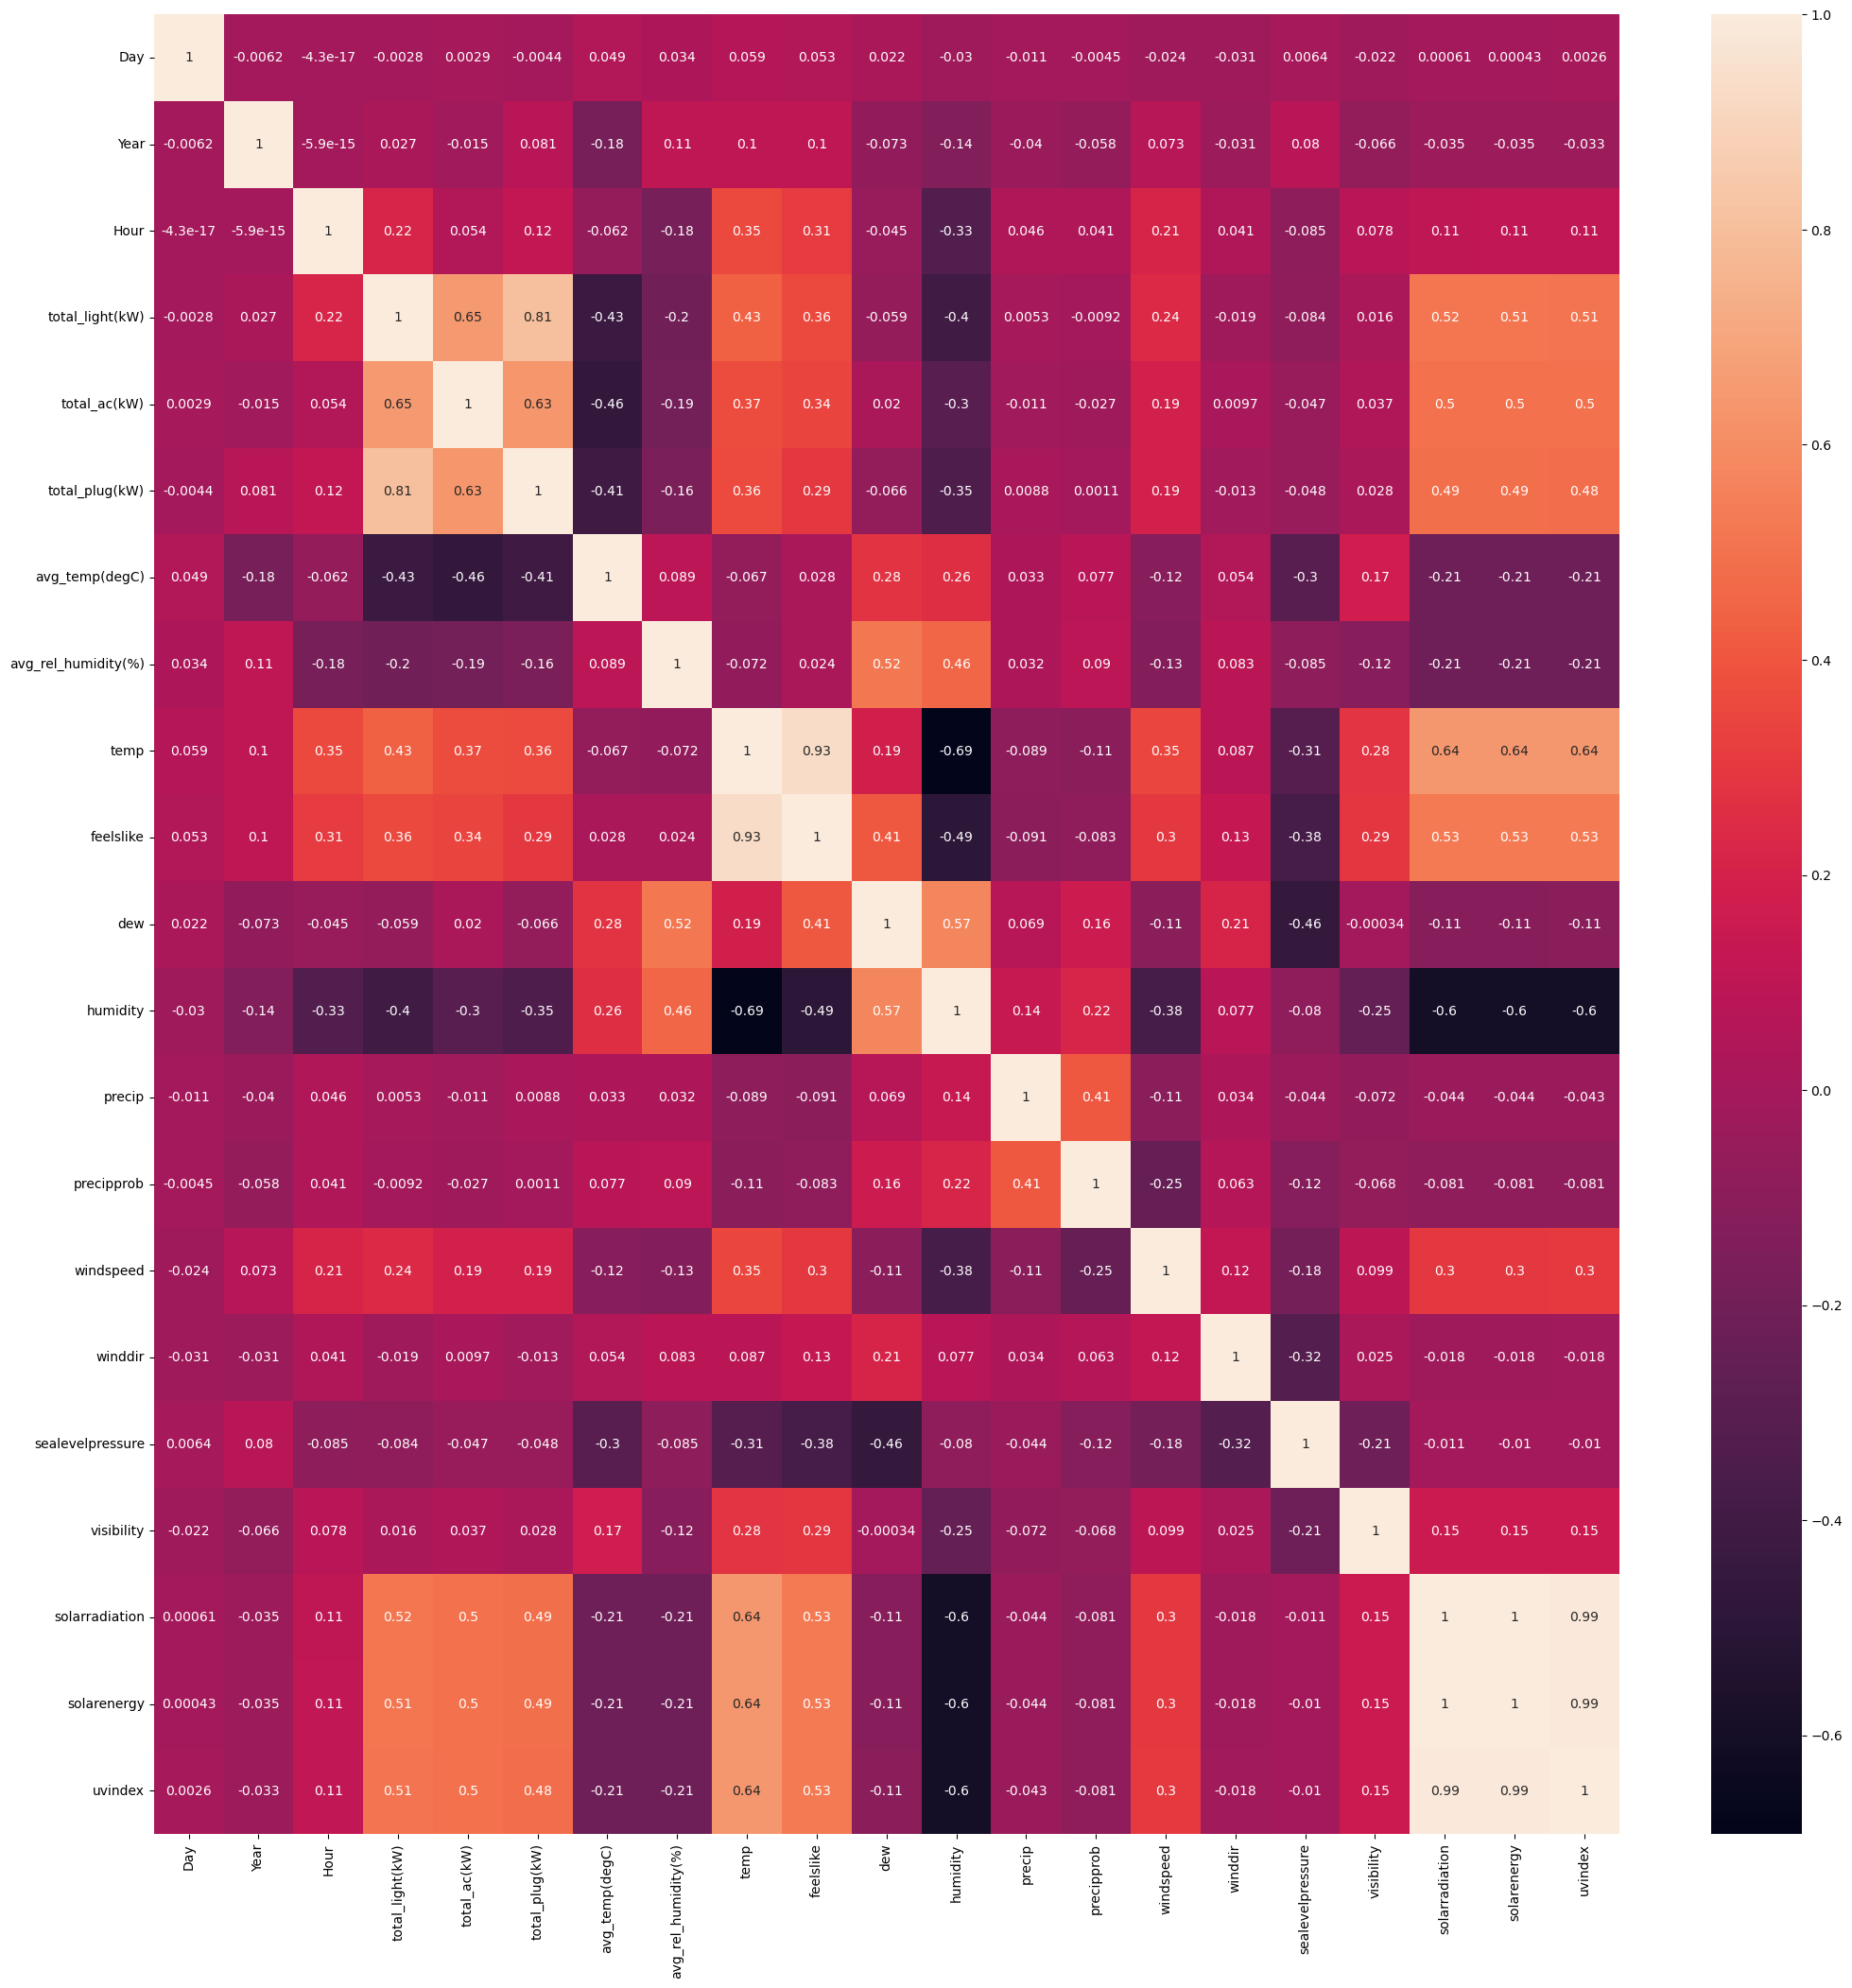

In [279]:
#creating a correlation heatmap
fig, ax=plt.subplots(figsize=(25,25))
corr=building_meteo.corr()
ax=sns.heatmap(corr, annot=True)
plt.show()

In [280]:
building_meteo.columns

Index(['Date', 'Day', 'Month', 'Year', 'Time', 'Hour', 'total_light(kW)',
       'total_ac(kW)', 'total_plug(kW)', 'avg_temp(degC)',
       'avg_rel_humidity(%)', 'datetime', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'preciptype', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'icon'],
      dtype='object')

Seasonal Variation:

In [281]:
years_to_average = [2018, 2019]

two_years_data = building_meteo[building_meteo['Year'].isin(years_to_average)]

# Group by month and calculate the mean for each month
monthly_average_between_two_years = two_years_data.groupby('Month').mean().reset_index()

In [282]:
wetseason=['July','August','September','October']
coolseason=['November','December','January','February']
hotseason=['March','April','May','June']

wetseason_floor1 = monthly_average_between_two_years[monthly_average_between_two_years['Month'].isin(wetseason)]
coolseason_floor1 = monthly_average_between_two_years[monthly_average_between_two_years['Month'].isin(coolseason)]
hotseason_floor1 = monthly_average_between_two_years[monthly_average_between_two_years['Month'].isin(hotseason)]

In [283]:
overall_mean_wetseason = wetseason_floor1.mean()
overall_mean_coolseason =coolseason_floor1.mean()
overall_mean_hotseason =hotseason_floor1.mean()

C:\Users\usuario\AppData\Local\Temp\ipykernel_3896\2851934193.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_mean_wetseason = wetseason_floor1.mean()
C:\Users\usuario\AppData\Local\Temp\ipykernel_3896\2851934193.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_mean_coolseason =coolseason_floor1.mean()
C:\Users\usuario\AppData\Local\Temp\ipykernel_3896\2851934193.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_mean_hotseason =hotseason_floor1.mean()


In [284]:
overall_mean_wetseason=pd.DataFrame(overall_mean_wetseason).T
overall_mean_wetseason['Season']='wet'

overall_mean_coolseason=pd.DataFrame(overall_mean_coolseason).T
overall_mean_coolseason['Season']='cool'

overall_mean_hotseason=pd.DataFrame(overall_mean_hotseason).T
overall_mean_hotseason['Season']='hot'

In [285]:
overall_mean_hotseason

,Day,Year,Hour,total_light(kW),total_ac(kW),total_plug(kW),avg_temp(degC),avg_rel_humidity(%),temp,feelslike,...,precip,precipprob,windspeed,winddir,sealevelpressure,visibility,solarradiation,solarenergy,uvindex,Season
0,15.75,2019.0,11.5,5.575147,24.625875,0.655719,25.925369,68.377828,30.79667,36.85901,...,0.109469,5.378584,10.078853,191.83737,1008.065429,9.532989,128.606141,0.462499,1.275437,hot


In [286]:
seasonal_averages= pd.concat([overall_mean_wetseason,overall_mean_coolseason,overall_mean_hotseason], axis=0)
seasonal_averages

,Day,Year,Hour,total_light(kW),total_ac(kW),total_plug(kW),avg_temp(degC),avg_rel_humidity(%),temp,feelslike,...,precip,precipprob,windspeed,winddir,sealevelpressure,visibility,solarradiation,solarenergy,uvindex,Season
0,15.875,2018.50,11.5,6.032265,22.892105,0.754188,25.991678,66.574526,28.988440,33.066517,...,0.293059,10.760529,8.768394,194.011474,1008.029040,9.587064,119.420456,0.429670,1.178310,wet
0,15.500,2018.75,11.5,5.271329,16.012769,0.637632,22.914122,65.568091,28.498869,31.055912,...,0.024178,1.181116,7.860416,151.360405,1012.233251,8.974417,113.283609,0.407053,1.122659,cool
0,15.750,2019.00,11.5,5.575147,24.625875,0.655719,25.925369,68.377828,30.796670,36.859010,...,0.109469,5.378584,10.078853,191.837370,1008.065429,9.532989,128.606141,0.462499,1.275437,hot


Variation of energy consumption with rain

In [287]:
building_meteo.columns

Index(['Date', 'Day', 'Month', 'Year', 'Time', 'Hour', 'total_light(kW)',
       'total_ac(kW)', 'total_plug(kW)', 'avg_temp(degC)',
       'avg_rel_humidity(%)', 'datetime', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'preciptype', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'icon'],
      dtype='object')

In [289]:
# Null Hypothesis (H0): Rainfall has no significant impact on energy consumption.
# Alternative Hypothesis (H1): Rainfall has a significant impact on energy consumption.

# we select a value for alpha of 0.05 (p-value threshold, significance level)
# Two-sided test:
# Null hypothesis or H0: = 30
# Alternative hyp or H1: <> 30

stat, pval = ttest_1samp(building_meteo['Hourly Rate'],30)
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

KeyError: 'Hourly Rate'

In [296]:
import statsmodels.api as sm

# Hypotheses:
# Null Hypothesis (H0): Rainfall has no significant impact on energy consumption.
# Alternative Hypothesis (H1): Rainfall has a significant impact on energy consumption.

# Add a constant for the regression model
building_meteo['constant'] = 1

# Specify independent variables (add other variables if needed)
independent_vars = ['precip', 'temp', 'humidity','winddir','uvindex']

# Perform multiple linear regression
model = sm.OLS(building_meteo['total_ac(kW)'], building_meteo[independent_vars])
results = model.fit()

# Extract the p-value associated with the 'rainfall' variable
p_value_rainfall = results.pvalues['temp']

# Set the significance level (alpha)
alpha = 0.05

# Print the p-value
print('P-value for Rainfall:', p_value_rainfall)

# Check if the p-value is below the significance level
if p_value_rainfall < alpha:
    print("Reject the null hypothesis. There is evidence of a significant impact of exterior temperature on air conditioning consumption.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant impact of exterior temperature on air conditioning consumption.")


P-value for Rainfall: 3.5517044799500718e-12
Reject the null hypothesis. There is evidence of a significant impact of exterior temperature on air conditioning consumption.


In [293]:
import statsmodels.api as sm

# Hypotheses:
# Null Hypothesis (H0): Rainfall has no significant impact on energy consumption.
# Alternative Hypothesis (H1): Rainfall has a significant impact on energy consumption.

# Add a constant for the regression model
building_meteo['constant'] = 1

# Specify independent variables (add other variables if needed)
independent_vars = ['precip', 'temp', 'humidity','winddir','uvindex']

# Perform multiple linear regression
model = sm.OLS(building_meteo['total_light(kW)'], building_meteo[independent_vars])
results = model.fit()

# Extract the p-value associated with the 'rainfall' variable
p_value_rainfall = results.pvalues['precip']

# Set the significance level (alpha)
alpha = 0.05

# Print the p-value
print('P-value for Rainfall:', p_value_rainfall)

# Check if the p-value is below the significance level
if p_value_rainfall < alpha:
    print("Reject the null hypothesis. There is evidence of a significant impact of rainfall on energy consumption.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant impact of rainfall on energy consumption.")


P-value for Rainfall: 2.514780038407863e-10
Reject the null hypothesis. There is evidence of a significant impact of rainfall on energy consumption.
